In [1]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [2]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

5.0


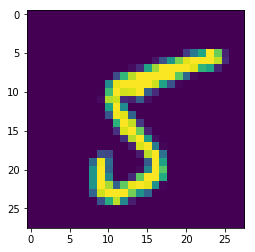

In [3]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][0].reshape(28,28))
print(train['labels'][0])

# Обучаем модель

In [4]:
X = train['data']
y = train['labels']

# конвертируем метки классов к 1/-1
y[y==5.] = -1
y[y==6.] = 1

# нормировка входных данных
def norm(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / (std+0.0001)
    return X

X = norm(X)


# добавляем единичную колонку для w0
def add_bias(X):
    return np.hstack([ np.ones((X.shape[0], 1)), X] )
    
X = add_bias(X)

In [5]:
# делим данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [6]:
# логистическая функция потерь на одном примере
def logloss(X, y, w):
    result = 0
    for i, y_i in enumerate(y):
        result += np.log(1 + math.exp(-y_i * np.dot(w.T, X[i])))
    return result / X.shape[0] 

# функция вероятности
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# количество правильных ответов
def right_answers(X, y, w):
    count = 0
    for i, y_i in enumerate(y): 
        if sigmoid(np.dot(w.T, X[i])) >= 0.5 and y_i == 1:
            count += 1
        if sigmoid(np.dot(w.T, X[i])) <= 0.5 and y_i == -1:
            count += 1
    return count

In [7]:
def logistic_regression(X, y, x_test, y_test, learning_rate = 0.0005, lambda_ = 0.001, steps = 30):
    
    # Инициализируем веса случайны образом
    np.random.seed(11)
    w = np.random.normal(scale = 0.001, size = X.shape[1])
    
    loss_train = []
    loss_test = []
    right_answers_train = []
    right_answers_test = []

    for iter in tqdm.tqdm_notebook(range(steps)):

        for i in range(X.shape[0]):
            j = np.random.randint(0, X.shape[0])
            grad = - y[j] * X[j] / ( 1 + np.exp( y[j] * np.dot(w.T, X[j]) )) + lambda_ * w 
            w = w - learning_rate * grad
        
        loss_train.append(logloss(X, y, w))  
        right_answers_train.append(right_answers(X, y, w))
        
        loss_test.append(logloss(x_test, y_test, w) ) 
        right_answers_test.append(right_answers(x_test, y_test, w))

    return loss_train, right_answers_train, loss_test, right_answers_test, w

In [8]:
loss_train, right_answers_train, loss_test, right_answers_test, w = \
                                                        logistic_regression(x_train,y_train, x_test, y_test)

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

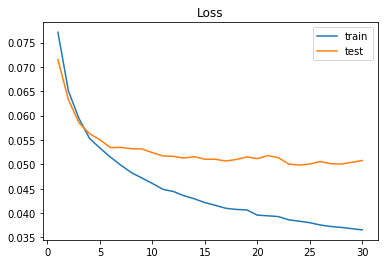

In [12]:
plt.title('Loss')
steps = range(1, 31)
plt.plot(steps, loss_train, label='train')
plt.plot(steps, loss_test,  label='test')
plt.legend()

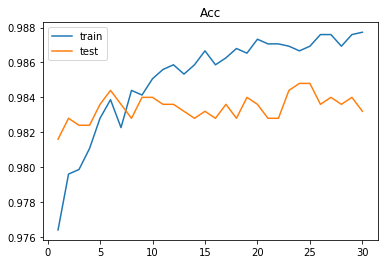

In [13]:
plt.title('Acc')
plt.plot(steps, [ elem / x_train.shape[0] for elem in right_answers_train], label='train')
plt.plot(steps, [ elem / x_test.shape[0] for elem in right_answers_test], label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [11]:
K = test_no_lables['data']
K = norm(K)
K = add_bias(K)

# compute Y_pred
Y_pred = sigmoid(np.dot(K,w))

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(test_no_lables['data'])):
        print(i, Y_pred[i], sep=',', file=fout)

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/34e77301ef914c5792e4f4306144a6b3 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Тему письма писать в формате "[МФТИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем <ваша фамилия>.ipynb